In [12]:
# Import the function to get connect to the db
from snowexsql.db import get_db

# Import data from the SQL database
from snowexsql.data import SiteData, PointData, LayerData, ImageData

# Import a useful function to format that data into a dataframe
from snowexsql.conversions import query_to_geopandas

# Import some tools to build dates 
from datetime import date

# This is what you will use for all of hackweek to access the db
db_name = 'snow:hackweek@52.32.183.144/snowex'

# Using the function get_db, we receive 2 ways to interact with the database
engine, session = get_db(db_name)

In [25]:
# Pick a dataset
dataset = 'temperature'

# Pick a date
collection_date = date(2020, 1, 31)

# The part inside the query function is what we want back, in this case all columns for the point data
qry = session.query(LayerData)

# We then want to filter by the selected the data type depth.
qry = qry.filter(LayerData.type == dataset)

# Filter by a date
qry = qry.filter(LayerData.date == collection_date)

# Filter by depth
qry = qry.filter(LayerData.depth == 0)

# Limit it to a couple thousand 
qry = qry.limit(2000)


# Execute the query and convert to geopandas in one handy function
df = query_to_geopandas(qry, engine)

# how many did we retrieve?
print(f'{len(df.index)} records returned!')

17 records returned!


In [26]:
df

,site_name,date,time_created,time_updated,id,doi,date_accessed,instrument,type,units,...,geom,time,depth,site_id,bottom_depth,comments,sample_a,sample_b,sample_c,value
0,Grand Mesa,2020-01-31,2021-06-01 18:41:28.544122+00:00,None,7019,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,POINT (741132.000 4327061.000),14:05:00-06:00,0.0,2C6,None,None,None,None,None,-1.3
1,Grand Mesa,2020-01-31,2021-06-01 18:41:29.814198+00:00,None,7464,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,POINT (741378.000 4326992.000),10:55:00-06:00,0.0,1C7,None,None,None,None,None,-1.1
2,Grand Mesa,2020-01-31,2021-06-01 18:41:31.368784+00:00,None,8003,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,POINT (740765.000 4327379.000),12:27:00-06:00,0.0,2C3,None,None,None,None,None,-2.5
3,Grand Mesa,2020-01-31,2021-06-01 18:41:33.776808+00:00,None,8874,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,POINT (741580.000 4326713.000),11:50:00-06:00,0.0,2C9,None,None,None,None,None,-1.6
4,Grand Mesa,2020-01-31,2021-06-01 18:41:35.846668+00:00,None,9593,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,POINT (741493.000 4326833.000),15:10:00-06:00,0.0,1C8,None,None,None,None,None,-1.6
5,Grand Mesa,2020-01-31,2021-06-01 18:41:36.210425+00:00,None,9730,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,POINT (742453.000 4325752.000),14:01:00-06:00,0.0,1C14,None,None,None,None,None,-1.1
6,Grand Mesa,2020-01-31,2021-06-01 18:41:37.972137+00:00,None,10362,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,POINT (740508.000 4327577.000),11:07:00-06:00,0.0,1C1,None,None,None,None,None,-1.7
7,Grand Mesa,2020-01-31,2021-06-01 18:41:38.002865+00:00,None,10375,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,POINT (741960.000 4326644.000),13:05:00-06:00,0.0,6C10,None,None,None,None,None,-0.6
8,Grand Mesa,2020-01-31,2021-06-01 18:41:39.131912+00:00,None,10799,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,POINT (745010.000 4323372.000),09:15:00-06:00,0.0,9C28,None,None,None,None,None,-1.0
9,Grand Mesa,2020-01-31,2021-06-01 18:41:41.958275+00:00,None,11700,https://doi.org/10.5067/DUD2VZEVBJ7S,2021-05-30,None,temperature,None,...,POINT (740652.000 4327445.000),09:00:00-06:00,0.0,2C2,None,None,None,None,None,-2.1


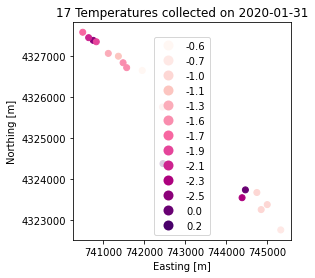

In [27]:
# Get the Matplotlib Axes object from the dataframe object, color the points by snow depth value
ax = df.plot(column='value', legend=True, cmap='RdPu')

# Use non-scientific notation for x and y ticks
ax.ticklabel_format(style='plain', useOffset=False)

# Set the various plots x/y labels and title.
ax.set_title(f'{len(df.index)} {dataset.title()}s collected on {collection_date.strftime("%Y-%m-%d")}')
ax.set_xlabel('Easting [m]')
ax.set_ylabel('Northing [m]')

# Close the session to avoid hanging transactions
session.close()